In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

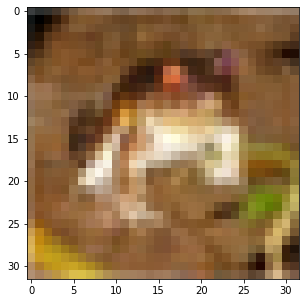

In [7]:
#visualize the data
plt.figure(figsize=(10,5))
plt.imshow(X_train[0])

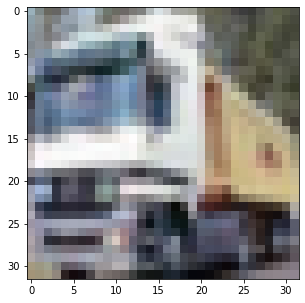

In [8]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[1])

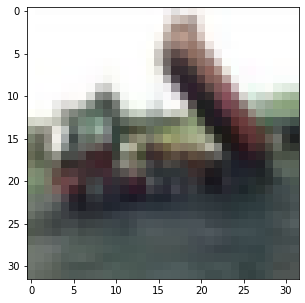

In [9]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[2])

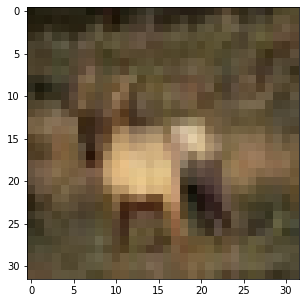

In [10]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[3])

In [11]:
class_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
class_labels[y_train[3][0]]

'deer'

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
y_train.shape

(50000, 1)

# preprocessing the data

In [16]:
#general rgb has maximum value is 255 so we going to divide all the image dataset with 255
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [17]:
#one hot encoding
y_train_category = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test_category = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [18]:
y_train[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [19]:
y_train_category[0:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Model building

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000,activation ='relu'),
    keras.layers.Dense(2000,activation ='relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])

model.compile(optimizer ='SGD',
             loss = 'categorical_crossentropy',
             metrics =  ['accuracy'])

model.fit(X_train_scaled, y_train_category, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 21s 10ms/step - loss: 1.8153 - accuracy: 0.3551
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6249 - accuracy: 0.4264
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5400 - accuracy: 0.4578
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4813 - accuracy: 0.4792
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4299 - accuracy: 0.4985
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3872 - accuracy: 0.5130
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3462 - accuracy: 0.5255
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3118 - accuracy: 0.5377
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2788 - accuracy: 0.5539
Epoch 10/10
1563/1563 [==============================] - 15s 10ms

In [21]:
model.predict(X_test_scaled)[0] # by using the code we don't known which class is this

313/313 [==============================] - 2s 4ms/step


array([0.30734733, 0.7344235 , 0.6474205 , 0.8873301 , 0.5958485 ,
       0.77932346, 0.65126145, 0.02370521, 0.583761  , 0.21330278],
      dtype=float32)

In [22]:
np.argmax(model.predict(X_test_scaled)[0]) # np.argmax will show the maximum value.So that we can find out which class

313/313 [==============================] - 1s 4ms/step


3

# Find the computing speed between cpu and gpu

In [23]:
def model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(4000,activation ='relu'),
        keras.layers.Dense(3000,activation ='relu'),
        keras.layers.Dense(2000,activation ='relu'),
        keras.layers.Dense(1000,activation ='relu'),
        keras.layers.Dense(10,activation ='sigmoid')
    ])
    
    model.compile(optimizer ='SGD',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

In [24]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = model()
    cpu_model.fit(X_train_scaled,y_train_category,epochs=1)

1563/1563 [==============================] - 240s 153ms/step - loss: 1.8060 - accuracy: 0.3545
4min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = model()
    gpu_model.fit(X_train_scaled,y_train_category,epochs=1)

1563/1563 [==============================] - 24s 15ms/step - loss: 1.8076 - accuracy: 0.3491
27.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
